In [32]:
# Import libaries 

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [33]:
# Import data 

liver = pd.read_csv('/content/indian_liver_patient.csv')
liver 

# Dataset - if they have liver disease or not (1: they have, 2: they don't)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [34]:
liver.shape

(583, 11)

In [35]:
liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [63]:
liver['Dataset'].value_counts()
# 1: they have liver disease, 2: they don't have liver disease

1    416
2    167
Name: Dataset, dtype: int64

In [36]:
liver.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [37]:
# Replace the missing Albumin and Globulin Ratio values with the mean
liver['Albumin_and_Globulin_Ratio'].fillna(liver['Albumin_and_Globulin_Ratio'].mean(), inplace = True)

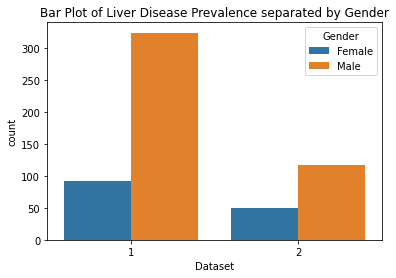

In [38]:
sns.countplot(x='Dataset', data = liver, hue = 'Gender')
plt.title('Bar Plot of Liver Disease Prevalence separated by Gender')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Total Bilitubin vs Total Proteins')

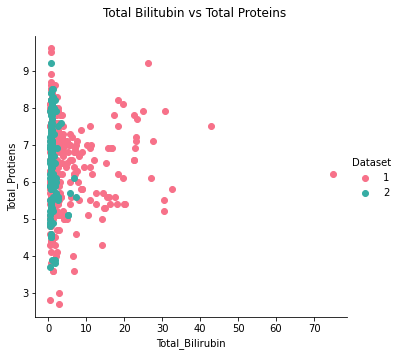

In [39]:
rp=sns.FacetGrid(liver, hue='Dataset', palette='husl', size=5).map(plt.scatter, 'Total_Bilirubin', 'Total_Protiens').add_legend()
rp.fig.subplots_adjust(top=0.9) 
rp.fig.suptitle('Total Bilitubin vs Total Proteins')

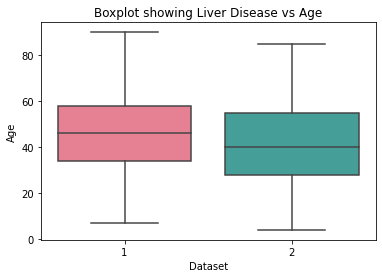

In [40]:
sns.boxplot(x='Dataset', y='Age', palette='husl', data=liver).set(title='Boxplot showing Liver Disease vs Age')
plt.show()

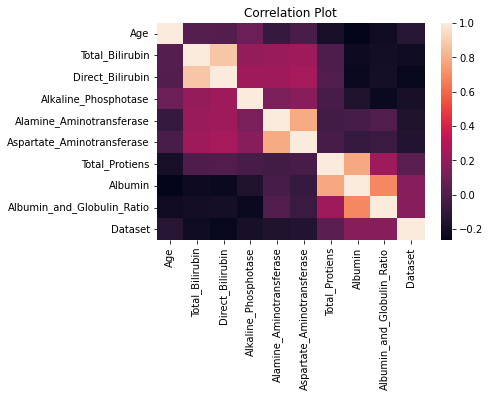

In [41]:
sns.heatmap(liver.corr())
plt.title('Correlation Plot')
plt.show()

In [42]:
# Hot Encoding - Gender
# 0 - Male, 1 - Female
liver['Gender'] = pd.get_dummies(liver['Gender'], drop_first = True)

In [43]:
# Split Data into targets and features
X = liver.drop('Dataset', axis = 1).values
y = liver['Dataset'].values

In [44]:
# Splitting data into training and tests

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [45]:
# Standardizing Dataset

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
# Fitting the model to training dataset 

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train.ravel())

LogisticRegression()

In [47]:
# Fitting the model to training dataset - Support Vector Machines

from sklearn import svm

linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())



In [48]:
# 5-Fold Cross Validation - Logistic Regression  

from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

k = 5
kf = KFold(n_splits=k)

result_lr = cross_val_score(lr, X_train, y_train.ravel(), cv = kf, scoring='accuracy') 
print(f'Logistic Regression Avg accuracy:{result_lr.mean()}')

Logistic Regression Avg accuracy:0.7303824149352606


In [49]:
# 5-Fold Cross Validation - Linear SVM 
result = cross_val_score(linear, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f'Linear SVM Avg accuracy:{result.mean()}')

Linear SVM Avg accuracy:0.7205660945498344


In [50]:
# 5-Fold Cross Validation - RBF SVM 
result = cross_val_score(rbf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f'RBF SVM Avg accuracy:{result.mean()}')

RBF SVM Avg accuracy:0.7377295995182175


In [51]:
# 5-Fold Cross Validation - Poly SVM 
result = cross_val_score(poly, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f'Poly SVM Avg accuracy:{result.mean()}')

Poly SVM Avg accuracy:0.7131285757302017


In [52]:
# 5-Fold Cross Validation - Sigmoid SVM 
result = cross_val_score(sig, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f'Sigmoid SVM Avg accuracy:{result.mean()}')

Sigmoid SVM Avg accuracy:0.7181571815718157


In [53]:
# Predicting test set results  - Logistic Regression  
y_pred_lr = lr.predict(X_test)

In [54]:
# Predicting test set results - Linear SVM
svm_linear_pred = linear.predict(X_test)

In [55]:
# Predicting test set results - RBF SVM
svm_rbf_pred = rbf.predict(X_test)

In [56]:
# Predicting test set results - Poly SVM
svm_poly_pred = poly.predict(X_test)

In [57]:
# Predicting test set results - Sigmoid SVM
svm_sig_pred = sig.predict(X_test)

In [58]:
# Classification Report - Logistic Regression

from sklearn.metrics import classification_report

print(f'Classification Report for Logistic Regression')
print(classification_report(y_test, y_pred_lr))

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           1       0.72      0.91      0.80       122
           2       0.45      0.17      0.25        53

    accuracy                           0.69       175
   macro avg       0.58      0.54      0.52       175
weighted avg       0.64      0.69      0.63       175



In [59]:
# Classification Report - Linear SVM
print(f'Classification Report for Linear SVM')
print(classification_report(y_test, svm_linear_pred))

Classification Report for Linear SVM
              precision    recall  f1-score   support

           1       0.70      1.00      0.82       122
           2       0.00      0.00      0.00        53

    accuracy                           0.70       175
   macro avg       0.35      0.50      0.41       175
weighted avg       0.49      0.70      0.57       175



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
# Classification Report - RBF SVM
print(f'Classification Report for RBF SVM')
print(classification_report(y_test, svm_rbf_pred))

Classification Report for RBF SVM
              precision    recall  f1-score   support

           1       0.71      0.96      0.82       122
           2       0.50      0.09      0.16        53

    accuracy                           0.70       175
   macro avg       0.60      0.53      0.49       175
weighted avg       0.65      0.70      0.62       175



In [64]:
# Classification Report - Poly SVM
print(f'Classification Report for Polynomial SVM')
print(classification_report(y_test, svm_poly_pred))

Classification Report for Polynomial SVM
              precision    recall  f1-score   support

           1       0.70      0.93      0.80       122
           2       0.27      0.06      0.09        53

    accuracy                           0.67       175
   macro avg       0.48      0.50      0.45       175
weighted avg       0.57      0.67      0.58       175



In [62]:
# Classification Report - Sigmoid SVM
print(f'Classification Report for Sigmoid SVM')
print(classification_report(y_test, svm_sig_pred))

Classification Report for Sigmoid SVM
              precision    recall  f1-score   support

           1       0.70      0.96      0.81       122
           2       0.38      0.06      0.10        53

    accuracy                           0.69       175
   macro avg       0.54      0.51      0.45       175
weighted avg       0.60      0.69      0.59       175

